In [2]:
import pandas as pd
import missingno as msn
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import spacy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as Sia

In [3]:
path_info = 'data/books_data.csv'
path_rating = 'data/Books_rating.csv'

# 1. Construct Features

### *A. Inquire structural integrity*

In [4]:
df_info = pd.read_csv(path_info)
df_rating = pd.read_csv(path_rating)

In [5]:
df_info.describe()

,ratingsCount
count,49752.000000
mean,21.252975
std,201.340431
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,4895.000000


In [6]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB


In [7]:
df_rating.describe()

,Price,review/score,review/time
count,481171.000000,3.000000e+06,3.000000e+06
mean,21.762656,4.215289e+00,1.132307e+09
std,26.206541,1.203054e+00,1.493202e+08
min,1.000000,1.000000e+00,-1.000000e+00
25%,10.780000,4.000000e+00,9.999072e+08
50%,14.930000,5.000000e+00,1.128298e+09
75%,23.950000,5.000000e+00,1.269130e+09
max,995.000000,5.000000e+00,1.362355e+09


In [8]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


### *B. Enhance data accessibility*

In [9]:
df_info = df_info.drop(["image", "previewLink", "publisher", "infoLink"], axis=1)

In [10]:
df_rating = df_rating.drop(["profileName", "review/time", "review/helpfulness", "review/summary"],
                                             axis=1)

In [11]:
df_info.rename(columns={'Title': 'book_title', 'authors': 'book_author', 'publishedDate': 'published_date',
                        'ratingsCount': 'ratings_count'}, inplace=True)

In [12]:
df_rating.rename(columns={'Id': 'book_id', 'Title': 'book_title', 'Price': 'book_price',
                          'User_id': 'user_id', 'review/text': 'review', 'review/score': 'rating'},
                              inplace=True)

In [13]:
df_info.columns

Index(['book_title', 'description', 'book_author', 'published_date',
       'categories', 'ratings_count'],
      dtype='object')

In [14]:
df_rating.columns

Index(['book_id', 'book_title', 'book_price', 'user_id', 'rating', 'review'], dtype='object')

### *C. Analyze for any Missing values*

In [15]:
null_checker = df_info.isnull().sum()

null_checker

book_title             1
description        68442
book_author        31413
published_date     25305
categories         41199
ratings_count     162652
dtype: int64

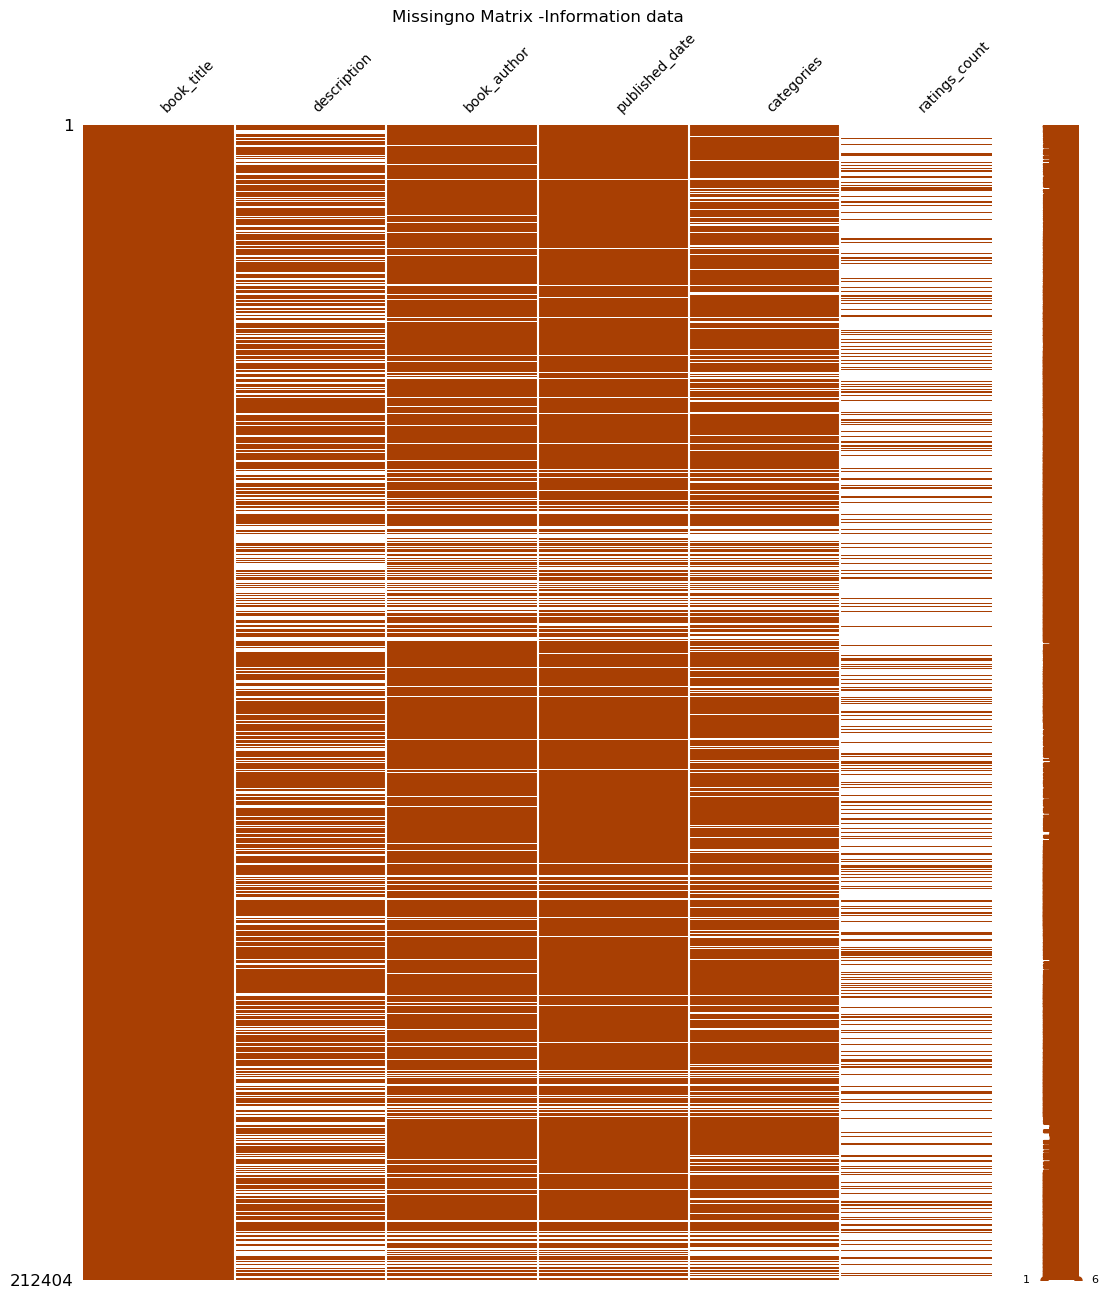

In [16]:
msn.matrix(df_info, color=(0.66, 0.25, 0.013), figsize=[13, 15], fontsize=10)
plt.title("Missingno Matrix -Information data")
plt.show()

In [17]:
null_checker = df_rating.isnull().sum()

null_checker

book_id             0
book_title        208
book_price    2518829
user_id        561787
rating              0
review              8
dtype: int64

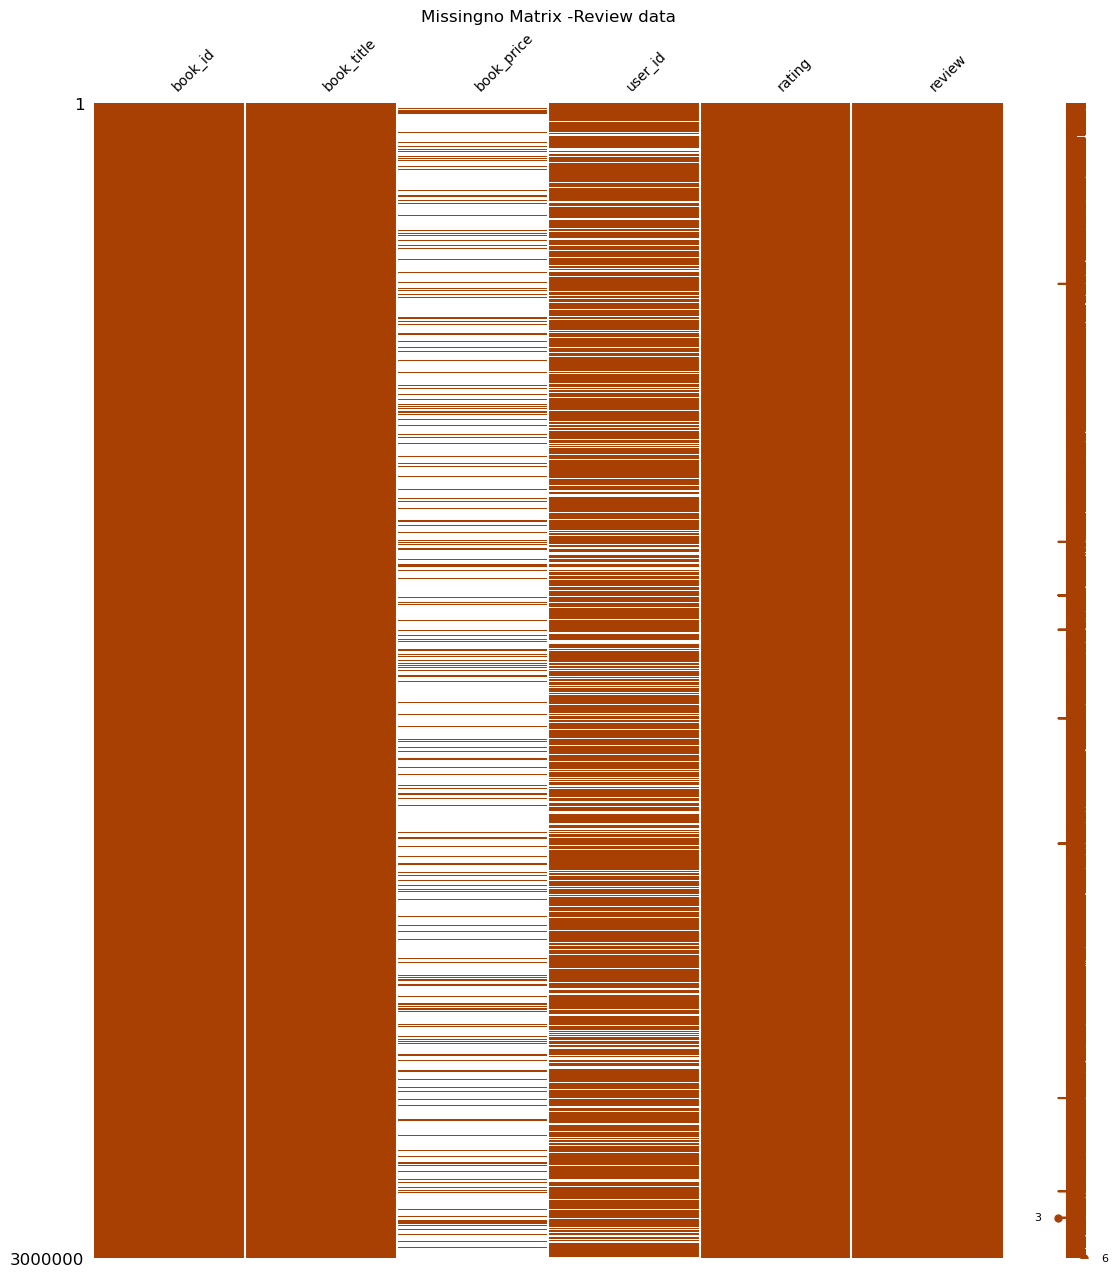

In [18]:
msn.matrix(df_rating, color=(0.66, 0.25, 0.013), figsize=[13, 15], fontsize=10)
plt.title("Missingno Matrix -Review data")
plt.show()

### *D. Clean NaN values from the data*

In [19]:
df_info.dropna(axis=0, how='any')

,book_title,description,book_author,published_date,categories,ratings_count
5,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],1996,['Religion'],5.0
31,Voices from the Farm: Adventures in Community ...,"Twenty-five years ago, at the height of the co...",['Rupert Fike'],2012-08-21,['Biography & Autobiography'],1.0
33,The Battleship Bismarck,The Bismarck is perhaps the most famous – and ...,['Stefan Draminski'],2018-09-20,['History'],1.0
42,Tess and the Highlander,"In 1543, on a windswept isle off of Scotland, ...",['May Mcgoldrick'],2002-11,['Juvenile Fiction'],2.0
43,Beginner's Yoruba (Hippocrene Beginner's Series),"""Beginner's Yoruba"" is now available with two ...",['Kayode J. Fakinlede'],2005,['Foreign Language Study'],1.0
...,...,...,...,...,...,...
212374,Thin Within,"I want to lose weight, but dieting just doesn'...","['Judy Halliday', 'Arthur Halliday']",2005-04-17,['Health & Fitness'],9.0
212392,The Awakening and Selected Stories (Modern Lib...,"WHEN IT FIRST APPEARED IN 1899, THE AWAKENING ...",['Kate Chopin'],2003,['Adultery'],2.0
212394,Final things,Grace's father believes in science and builds ...,['Jenny Offill'],2015-03-17,['Fiction'],4.0
212399,The Orphan Of Ellis Island (Time Travel Advent...,"During a school trip to Ellis Island, Dominick...",['Elvira Woodruff'],2000-06-01,['Juvenile Fiction'],2.0


In [20]:
df_rating.dropna(axis=0, how='any')

,book_id,book_title,book_price,user_id,rating,review
10,0829814000,Wonderful Worship in Smaller Churches,19.40,AZ0IOBU20TBOP,5.0,"I just finished the book, &quot;Wonderful Wors..."
11,0829814000,Wonderful Worship in Smaller Churches,19.40,A373VVEU6Z9M0N,5.0,Many small churches feel like they can not hav...
12,0829814000,Wonderful Worship in Smaller Churches,19.40,AGKGOH65VTRR4,5.0,I just finished reading this amazing book and ...
13,0829814000,Wonderful Worship in Smaller Churches,19.40,A3OQWLU31BU1Y,5.0,I hadn't been a small church pastor very long ...
14,0595344550,Whispers of the Wicked Saints,10.95,A3Q12RK71N74LB,1.0,I bought this book because I read some glowing...
...,...,...,...,...,...,...
2999953,0786182431,Very Bad Deaths: Library Edition,90.00,A1EC8SNPR56CLU,4.0,"""Very Bad Death"" is a so so story, but the cha..."
2999954,0786182431,Very Bad Deaths: Library Edition,90.00,A33VKWCAV9QQKC,5.0,Very Bad Deaths was a very great book! Spider ...
2999955,0786182431,Very Bad Deaths: Library Edition,90.00,A2PK3NTC9RMEF4,3.0,Anything by Spider Robinson is worth reading. ...
2999956,0786182431,Very Bad Deaths: Library Edition,90.00,A2D0PY6HIGTYIT,5.0,Great novel! Easy & enjoyable to read straight...


### *E. Remove data inconsistency by extracting the year values only*

In [21]:
year = 0
published_year = []
exception_list = []

for sample in df_info['published_date']:
    try:
        year = sample.split('-')[0]

    except Exception as exc:
        exception_list.append(exc)
        year = sample

    finally:
        published_year.append(year)

df_info['published_year'] = published_year
df_info = df_info.drop(['published_date'], axis=1)

df_info['published_year']

0         1996
1         2005
2         2000
3         2005
4         2003
          ... 
212399    2000
212400    1995
212401    2018
212402    2003
212403    1998
Name: published_year, Length: 212404, dtype: object

### *F. Dataframe Information*

In [22]:
df_info.head(20)

,book_title,description,book_author,categories,ratings_count,published_year
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],['Comics & Graphic Novels'],NaN,1996
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],['Biography & Autobiography'],NaN,2005
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],['Religion'],NaN,2000
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],['Fiction'],NaN,2005
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,NaN,2003
5,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],['Religion'],5.0,1996
6,The Overbury affair (Avon),NaN,['Miriam Allen De Ford'],NaN,NaN,1960
7,A Walk in the Woods: a Play in Two Acts,NaN,['Lee Blessing'],NaN,3.0,1988
8,Saint Hyacinth of Poland,The story for children 10 and up of St. Hyacin...,['Mary Fabyan Windeatt'],['Biography & Autobiography'],NaN,2009
9,Rising Sons and Daughters: Life Among Japan's ...,Wardell recalls his experience as a foreign st...,['Steven Wardell'],['Social Science'],NaN,1995


In [23]:
df_rating.head(20)

,book_id,book_title,book_price,user_id,rating,review
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,4.0,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,5.0,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,5.0,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,4.0,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,4.0,Philip Nel - Dr. Seuss: American IconThis is b...
5,0826414346,Dr. Seuss: American Icon,NaN,A2F6NONFUDB6UK,4.0,"""Dr. Seuss: American Icon"" by Philip Nel is a ..."
6,0826414346,Dr. Seuss: American Icon,NaN,A14OJS0VWMOSWO,5.0,Theodor Seuss Giesel was best known as 'Dr. Se...
7,0826414346,Dr. Seuss: American Icon,NaN,A2RSSXTDZDUSH4,5.0,When I recieved this book as a gift for Christ...
8,0826414346,Dr. Seuss: American Icon,NaN,A25MD5I2GUIW6W,5.0,Trams (or any public transport) are not usuall...
9,0826414346,Dr. Seuss: American Icon,NaN,A3VA4XFS5WNJO3,4.0,"As far as I am aware, this is the first book-l..."


# 2. Feature Analysis

### *A. Inspect distribution for Ratings*

In [24]:
bins = 10
text = " Plot for Book Ratings" 
x_label = "Ratings"
y_label = "Frequency"

kind = 'hist'

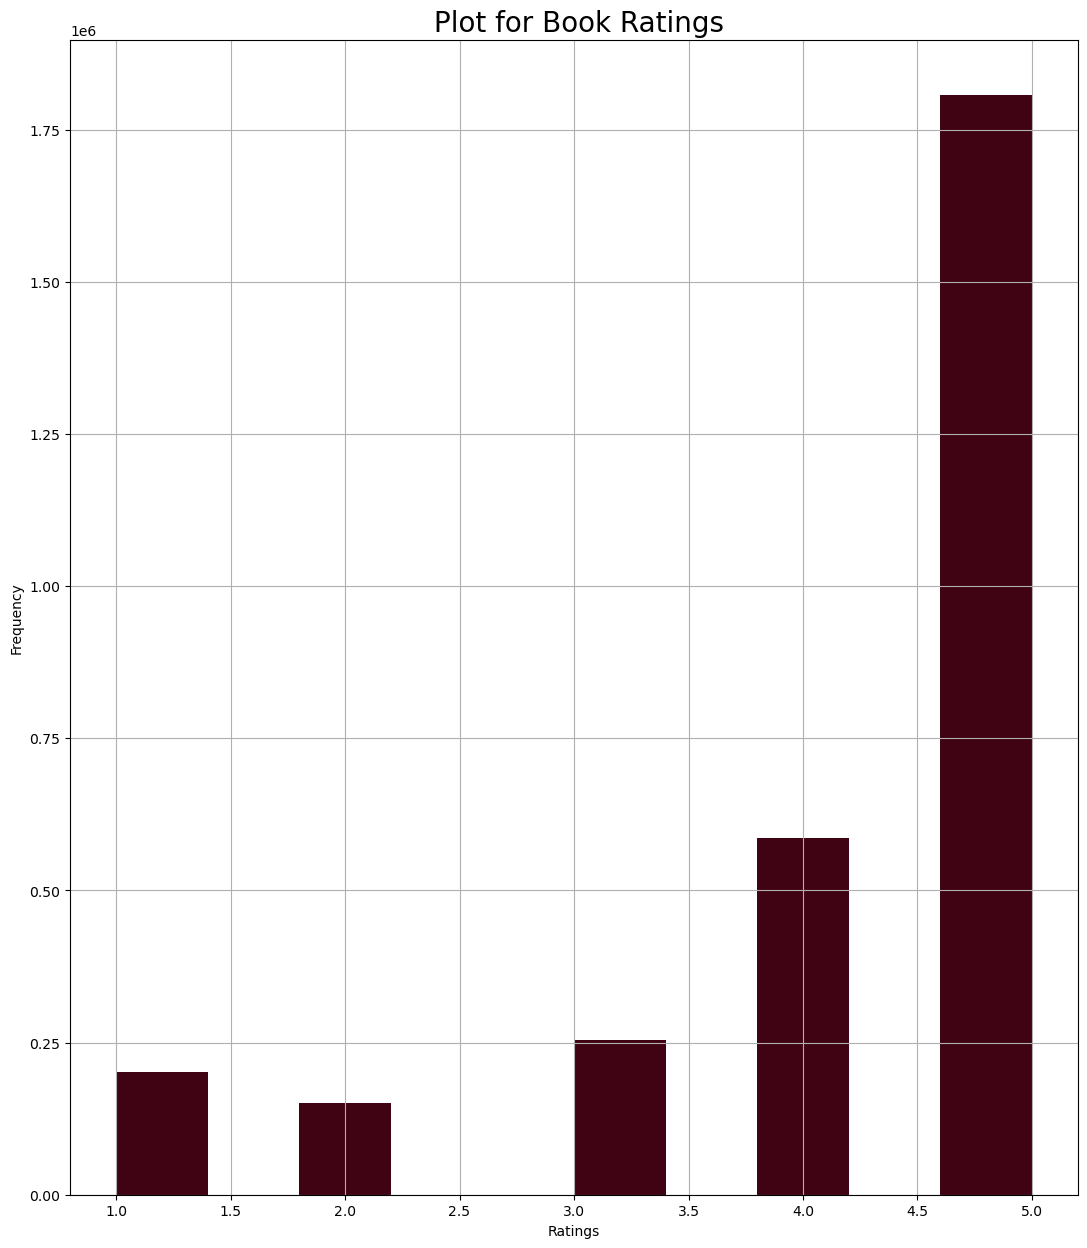

In [25]:
try:
    df_rating['rating'].plot(kind=kind, figsize=(13, 15), color=['#400313', '#2a1842', '#012136', '#062b2b'])

except Exception as exc:
    print("! ", exc)

else:
    plt.title(text, fontsize=20)
    plt.grid()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

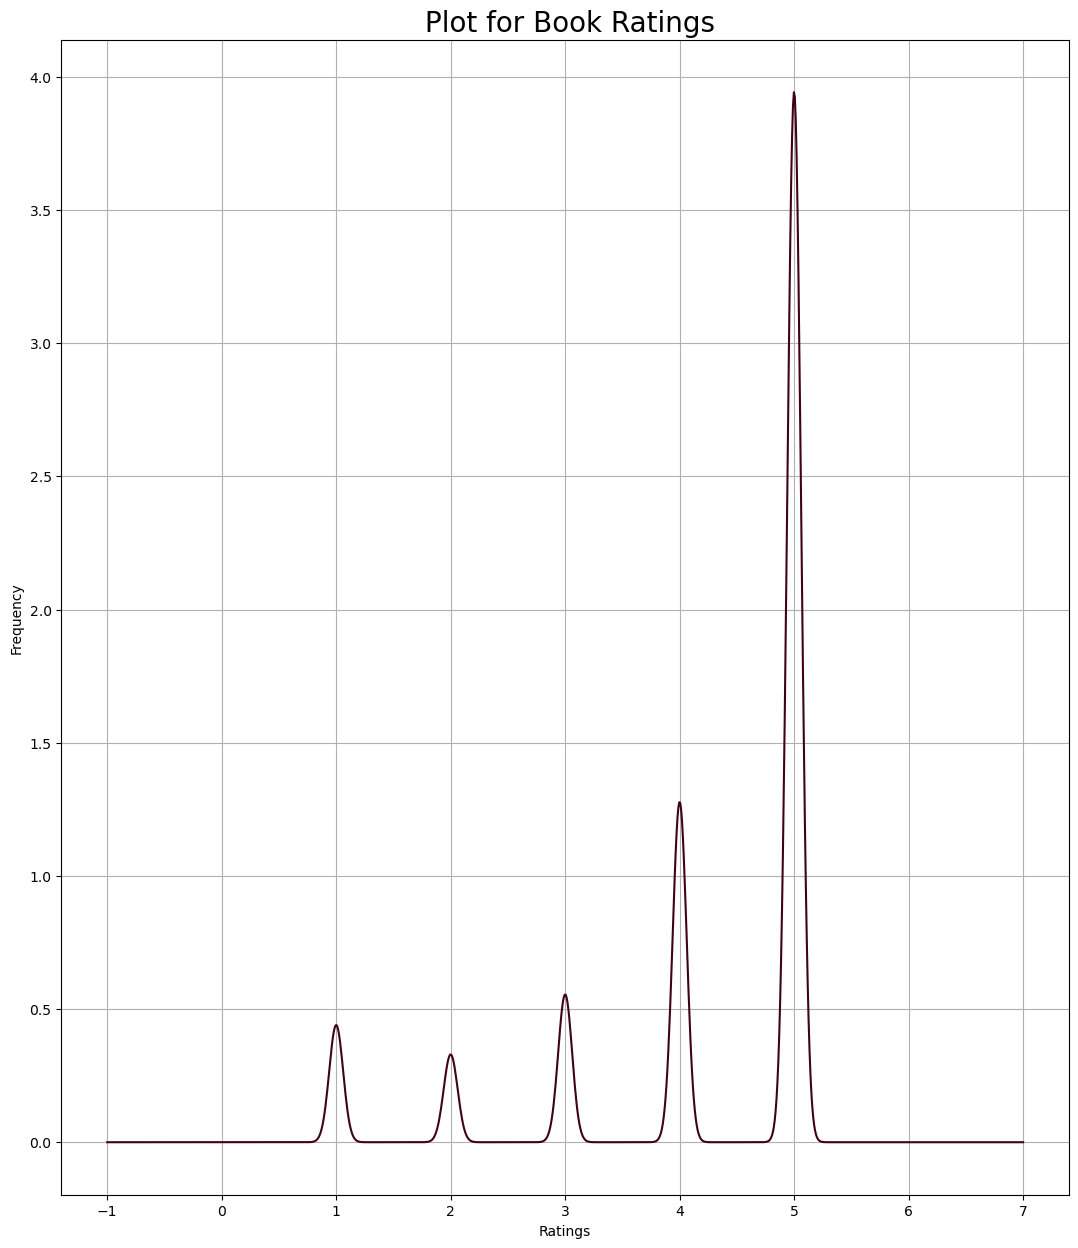

In [26]:
kind = 'kde'

try:
    df_rating['rating'].plot(kind=kind, figsize=(13, 15), color=['#400313', '#2a1842', '#012136', '#062b2b'])

except Exception as exc:
    print("! ", exc)

else:
    plt.title(text, fontsize=20)
    plt.grid()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

### *B. Acquire top 10 Book Genres*

In [27]:
subtext = "Pie Distribution of Book Genres"
genre = df_info['categories'].value_counts().sort_values(ascending=False)
genre = genre.head(10)

genre

['Fiction']                      23419
['Religion']                      9459
['History']                       9330
['Juvenile Fiction']              6643
['Biography & Autobiography']     6324
['Business & Economics']          5625
['Computers']                     4312
['Social Science']                3834
['Juvenile Nonfiction']           3446
['Science']                       2623
Name: categories, dtype: int64

### *Inspect distribution for Genres*

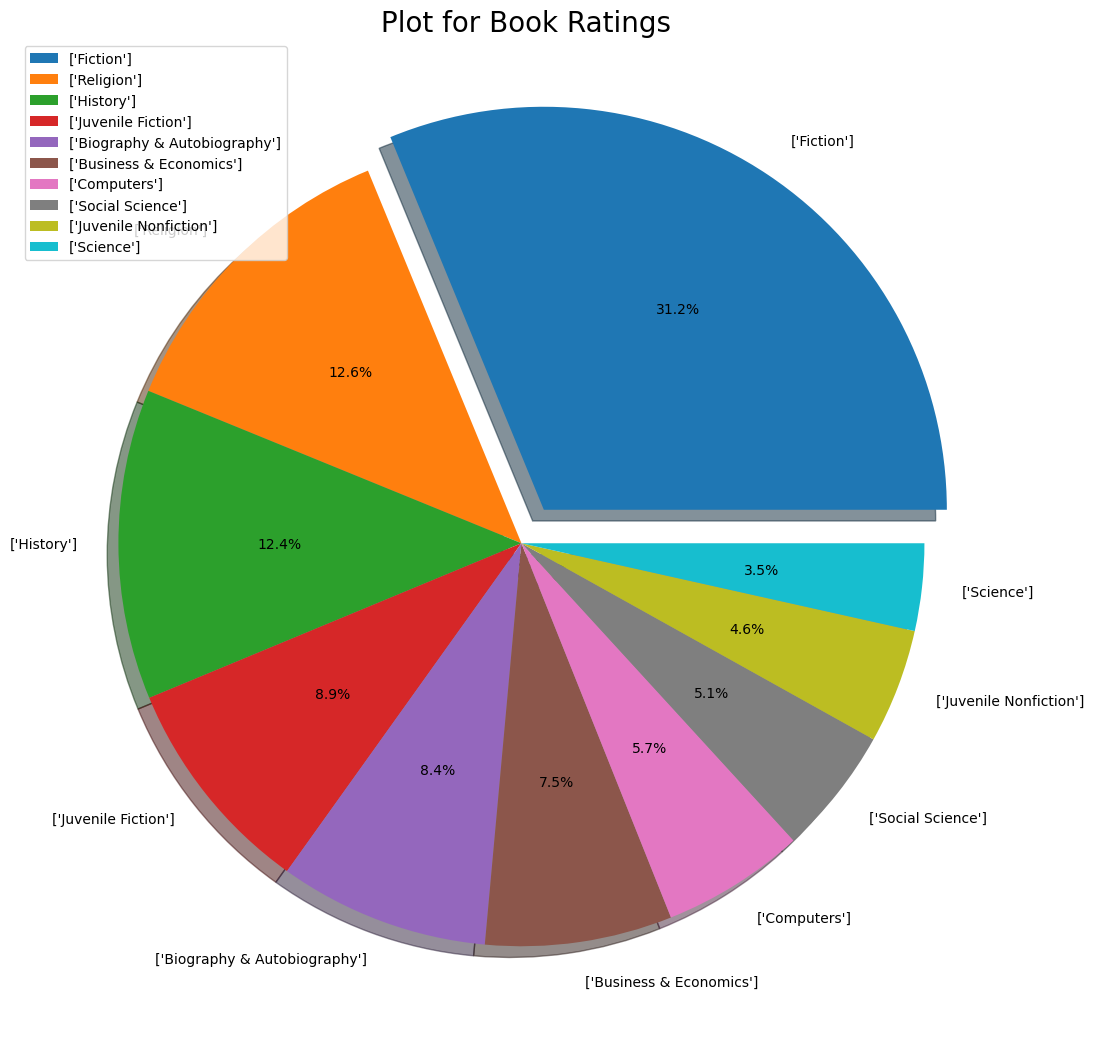

In [28]:
plt.figure(figsize=(13, 15))
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
labels = genre.keys().map(str)

try:
    plt.pie(genre, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)

except Exception as exc:
    print("! ", exc)

else:
    plt.title(text, fontsize=20)
    plt.axis('off')
    plt.legend(loc="upper left")
    plt.show()


### *C. Identify how much Book Ratings affect its Prices*

In [29]:
ratings_price = df_rating[['rating', 'book_price']]
ratings_price = ratings_price.sort_values(by=['book_price', 'rating'], ascending=False)

ratings_price

,rating,book_price
1501750,3.0,995.0
1726646,5.0,890.0
1726647,5.0,890.0
799943,5.0,875.0
799944,2.0,875.0
...,...,...
2999824,1.0,NaN
2999922,1.0,NaN
2999923,1.0,NaN
2999926,1.0,NaN


In [30]:
x = df_rating['rating']
y = df_rating['book_price']

text = "Scatter Plot for Ratings and Price"
x_label = 'Ratings'
y_label = 'Book Price'

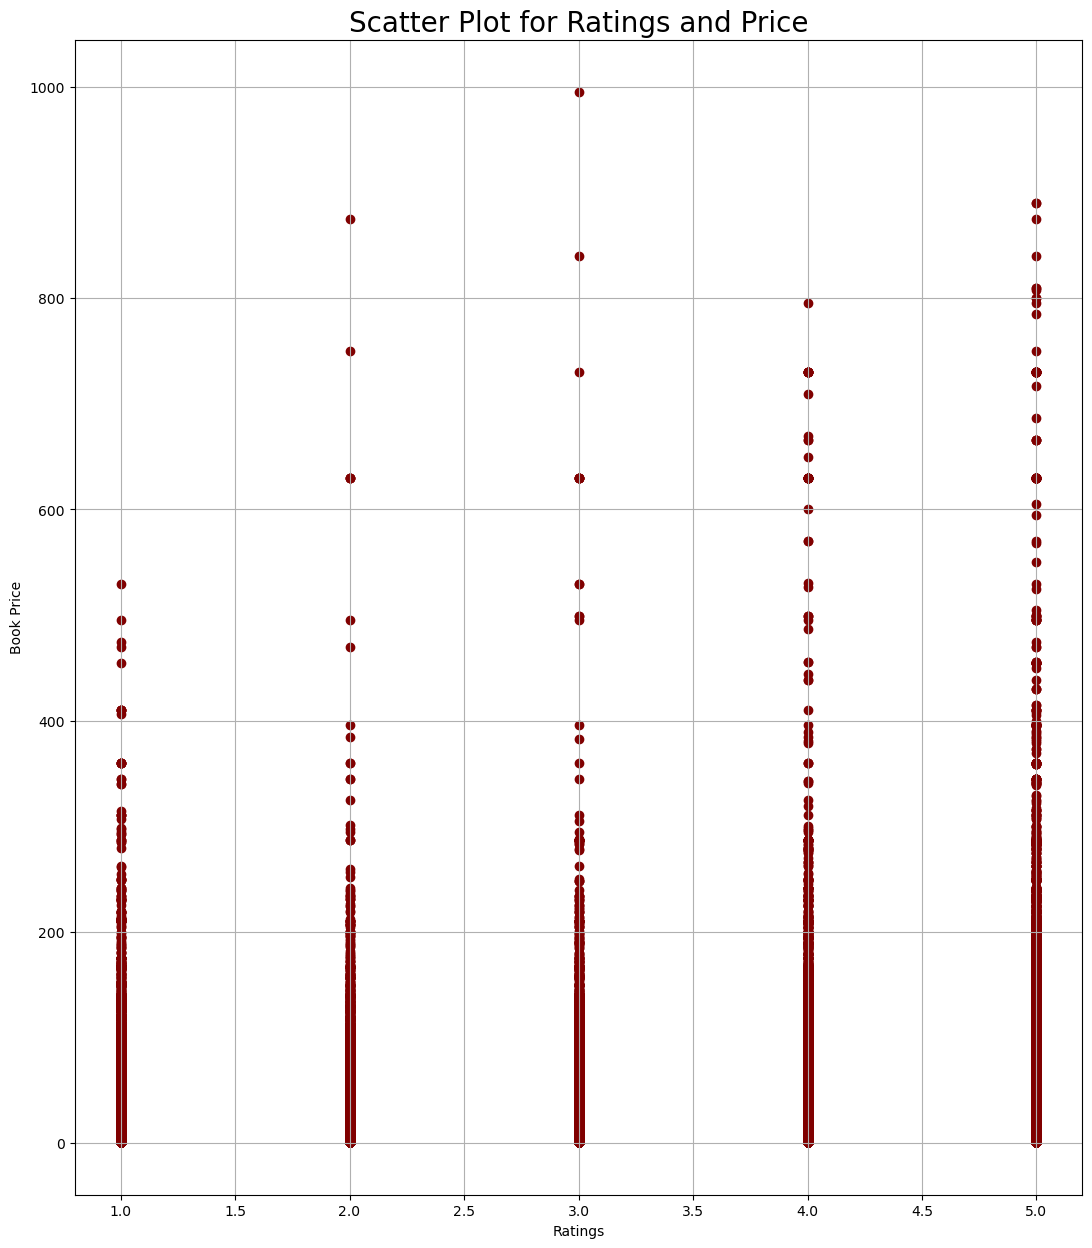

In [31]:
plt.figure(figsize=(13, 15))

try:
    plt.scatter(x, y, c='maroon')

except Exception as exc:
    print("! ", exc)

finally:
    plt.title(text, fontsize=20)
    plt.grid()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

### *D. Books most purchased by users*

In [32]:
most_purchases = df_rating.groupby('book_title')['user_id'].count().sort_values()
df_temp_rating = most_purchases.to_frame()
df_temp_rating['most_purchases'] = most_purchases

df_temp_rating['most_purchases']

book_title
you can do anything with crepes                                           0
Apache gold: A story of the strange Southwest                             0
Drunkard                                                                  0
Pointz Hall: The earlier and later typescripts of Between the acts        0
Nationalism in colonial Africa                                            0
                                                                      ...  
Great Expectations                                                     5675
Wuthering Heights                                                      8660
Atlas Shrugged                                                        10762
Pride and Prejudice                                                   17969
The Hobbit                                                            18237
Name: most_purchases, Length: 212403, dtype: int64

In [33]:
df_arg = df_temp_rating['most_purchases'].sort_values(ascending=False)

df_arg

book_title
The Hobbit                                                                   18237
Pride and Prejudice                                                          17969
Atlas Shrugged                                                               10762
Wuthering Heights                                                             8660
Great Expectations                                                            5675
                                                                             ...  
The Asian Gang: Ethnicity, Identity, Masculinity                                 0
The analysis of variance (A Wiley publication in mathematical statistics)        0
True Love and Bartholomew: Rebels on the Burmese Border                          0
Sodium-NaK engineering handbook                                                  0
you can do anything with crepes                                                  0
Name: most_purchases, Length: 212403, dtype: int64

### *Inspect query from the visualization chart*

In [34]:
text = "Books most bought by users"
x_label = "Purchases"
y_label = "Books"

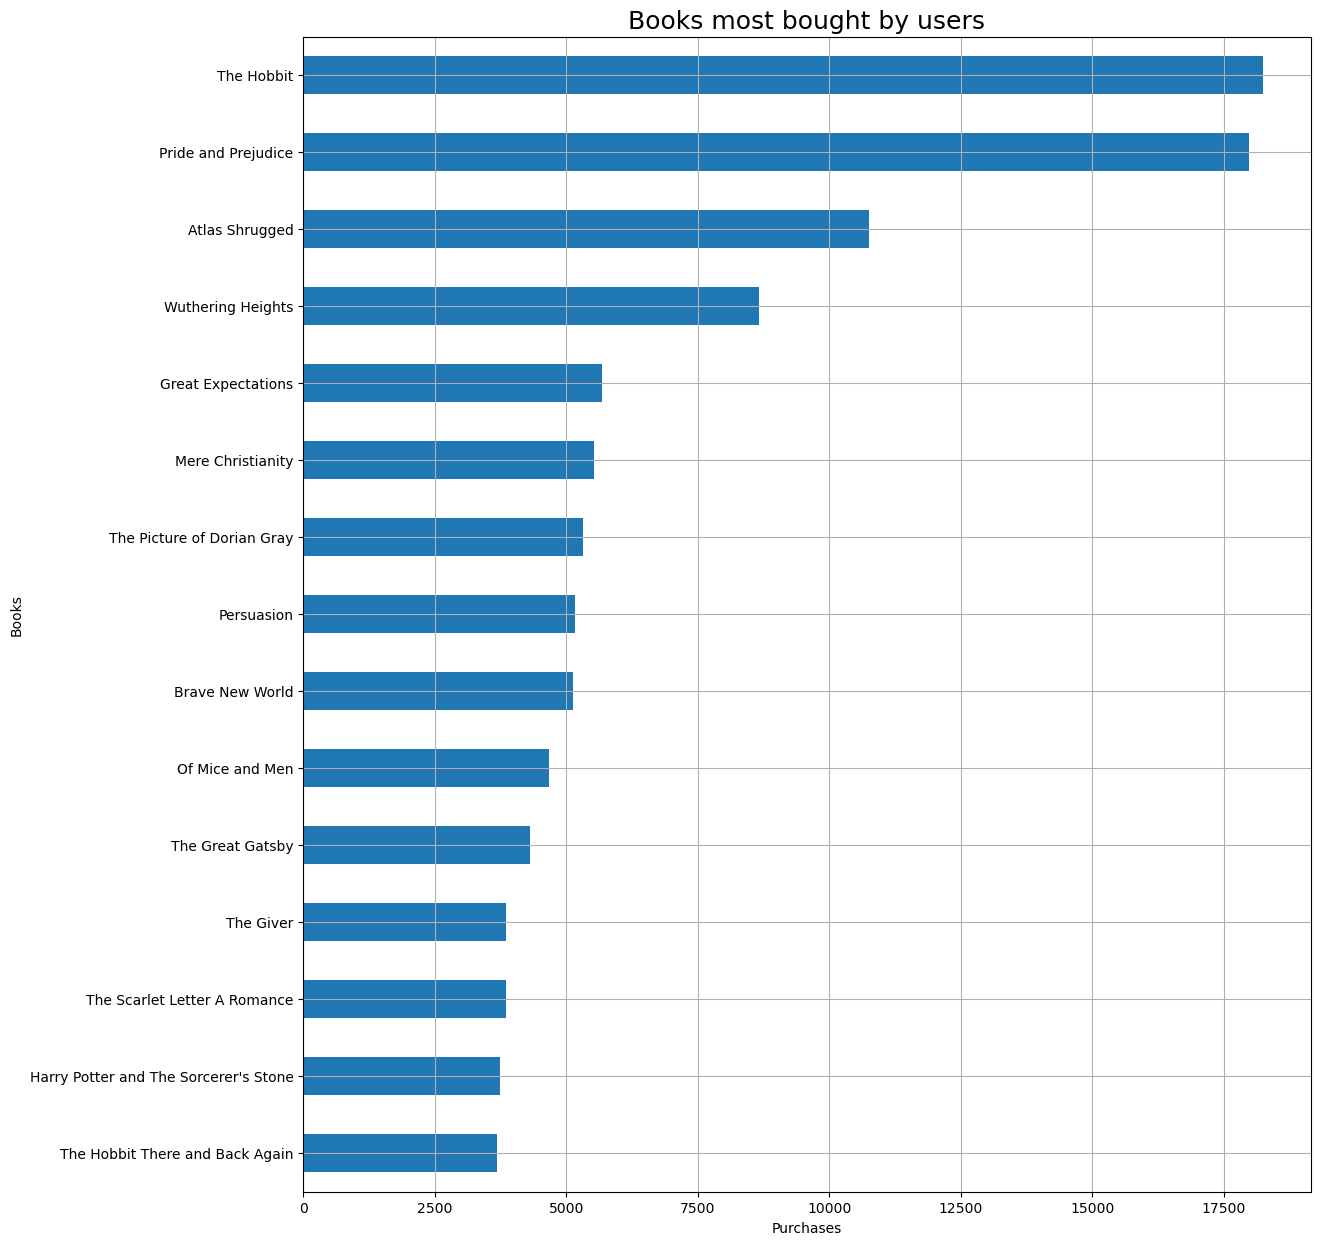

In [35]:
most_purchases[-15:].plot(kind='barh', figsize=(13, 15))
plt.title(text, fontsize=18)
plt.grid()
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.show()

### *E. Highest Rated Books (Mean)*

In [36]:
highest_rated = df_rating.groupby('book_title')['rating'].mean()
df_temp_rating = highest_rated.to_frame()
df_temp_rating['mean_ratings'] = highest_rated

df_temp_rating['mean_ratings']

book_title
" Film technique, " and, " Film acting "                                                                                                   4.500000
" We'll Always Have Paris": The Definitive Guide to Great Lines from the Movies                                                            5.000000
"... And Poetry is Born ..." Russian Classical Poetry                                                                                      4.000000
"A Titanic hero" Thomas Andrews, shipbuilder                                                                                               4.875000
"A Truthful Impression of the Country": British and American Travel Writing in China, 1880-1949                                            4.000000
                                                                                                                                             ...   
with an everlasting love                                                                             

In [37]:
df_arg = df_temp_rating['mean_ratings'].sort_values(ascending=False)

df_arg

book_title
The Christian year ;: Thoughts in verse for the Sundays and holidays throughout the year             5.0
The Book of Rugs                                                                                     5.0
The Book of Presidents by Orville V. Webster (14310)                                                 5.0
The Book of Psalms                                                                                   5.0
The Book of Psalms: A Selection of Fifty                                                             5.0
                                                                                                    ... 
A Collector's Guide to African Sculpture (A Schiffer Book for Collectors)                            1.0
Guitar for Beginners Taught By Happy Traum (Includes 6 Cassettes,Tablature Booklet,Guitar Stings)    1.0
Costume Language: A Dictionary of Dress Terms                                                        1.0
The Metal Databook                          

### *Inspect query from the visualization chart*        

In [38]:
text = "Books with the highest Rating"
x_label = "Ratings"
y_label = "Books"

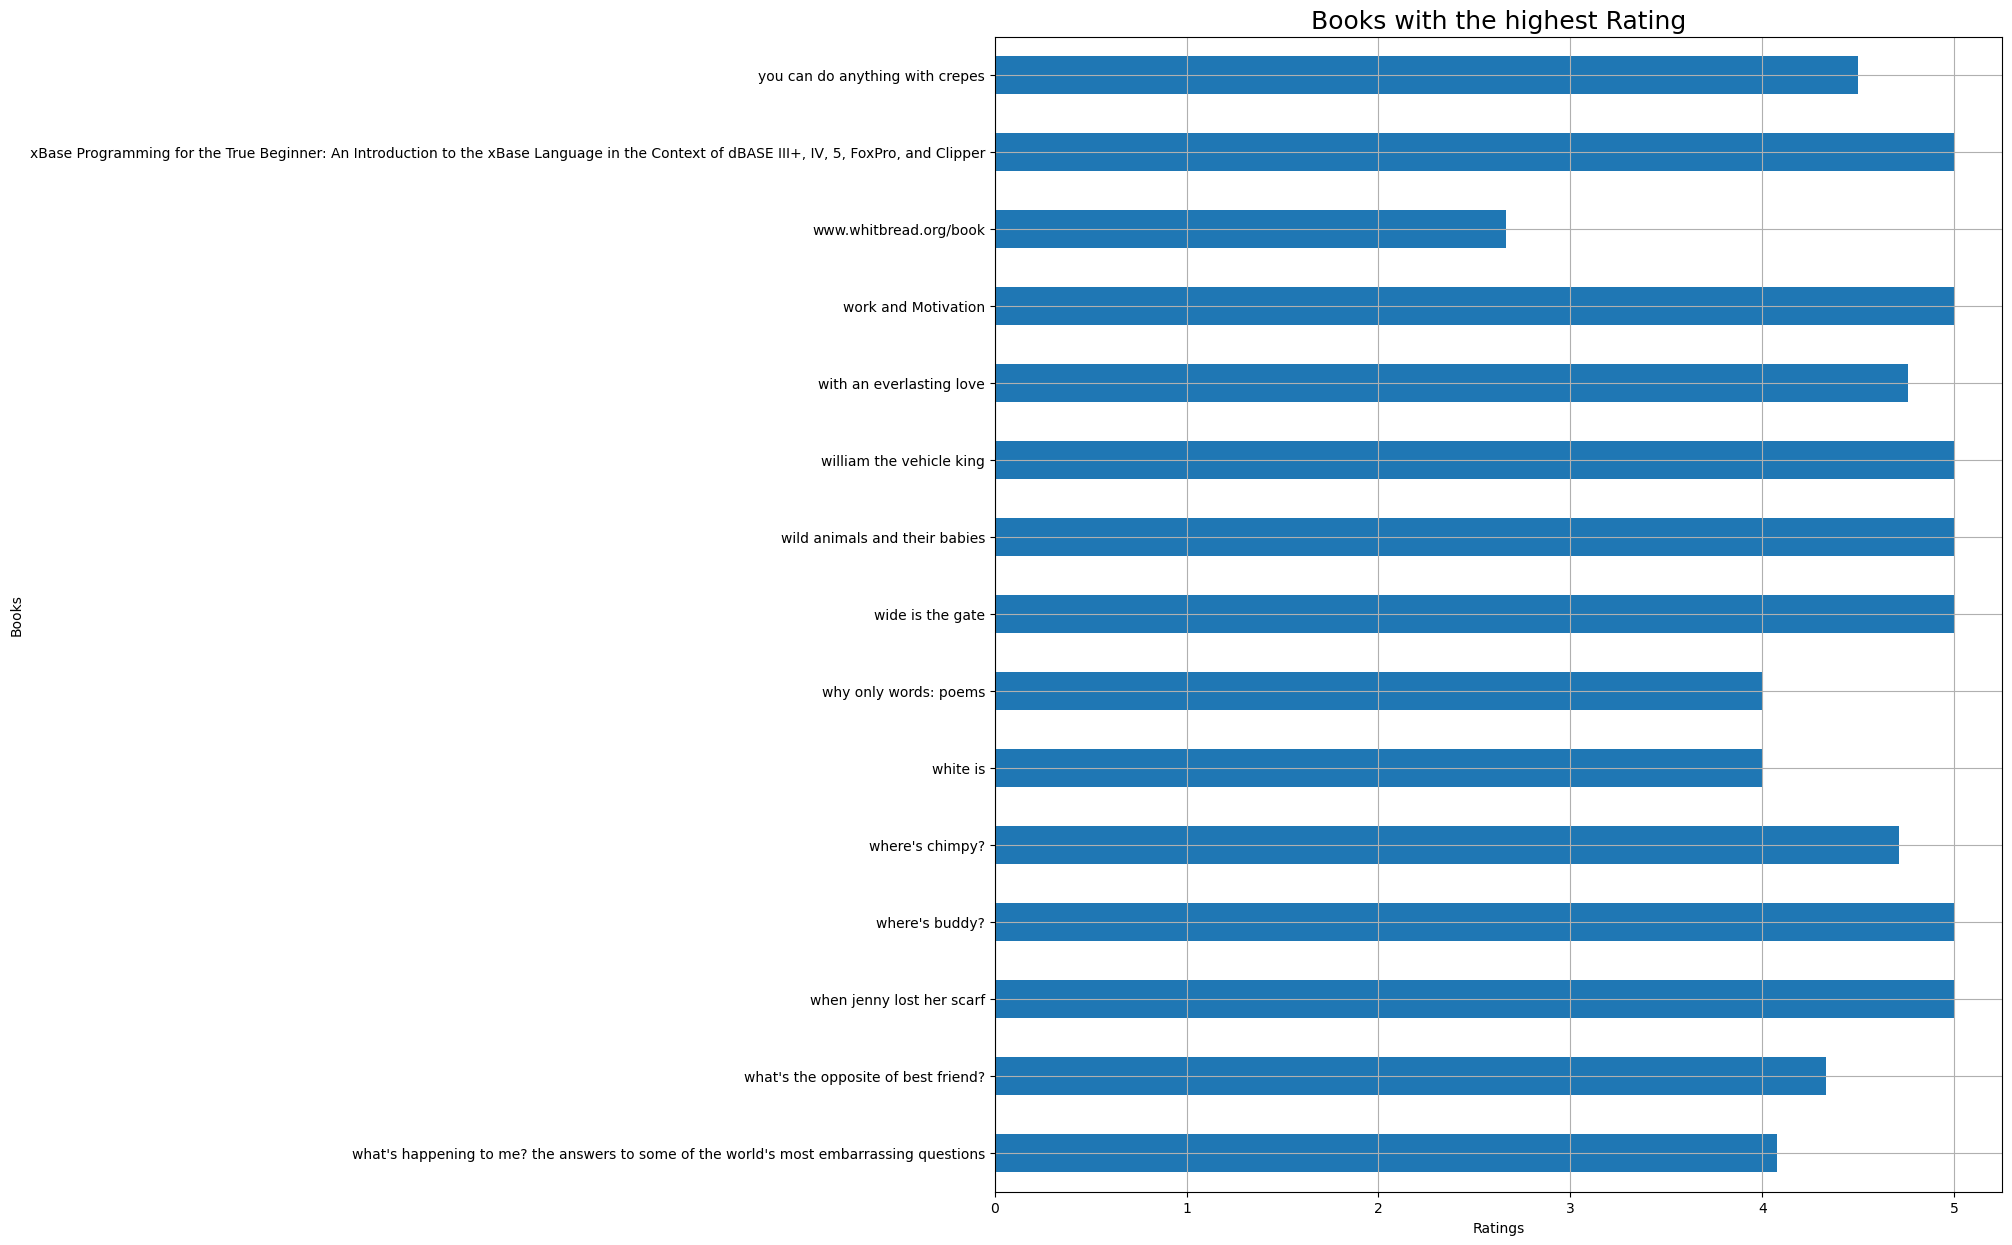

In [39]:
highest_rated[-15:].plot(kind='barh', figsize=(13, 15))
plt.title(text, fontsize=18)
plt.grid()
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.show()

### *F. Expensive Books in store (highest mean Price)*

In [40]:
expensive_books = df_rating.groupby('book_title')['book_price'].mean()
df_temp_rating = expensive_books.to_frame()
df_temp_rating['mean_price'] = expensive_books

df_temp_rating['mean_price']

book_title
" Film technique, " and, " Film acting "                                                                                                     NaN
" We'll Always Have Paris": The Definitive Guide to Great Lines from the Movies                                                              NaN
"... And Poetry is Born ..." Russian Classical Poetry                                                                                        NaN
"A Titanic hero" Thomas Andrews, shipbuilder                                                                                                 NaN
"A Truthful Impression of the Country": British and American Travel Writing in China, 1880-1949                                            70.27
                                                                                                                                           ...  
with an everlasting love                                                                                               

In [41]:
df_arg = df_temp_rating['mean_price'].sort_values(ascending=False)

df_arg

book_title
Visual Genetics Plus: Tutorial and Lab Simulations, Site License                                                                           995.0
Advances in Chemical Physics, Volume 119: Modern Nonlinear Optics, Parts 1-3, 2nd Edition                                                  890.0
Youmans Neurological Surgery (Four Volume Set)                                                                                             875.0
Chicago School Pragmatism (History of American Thought)                                                                                    840.0
Leechdoms, Wortcunning and Starcraft                                                                                                       840.0
                                                                                                                                           ...  
william the vehicle king                                                                                               

### *Distribution of Mean Book Prices*

In [42]:
text = "Plot for Book Prices"
x_label = "Price Range ($)"
y_label = "Frequency"
kind = 'hist'

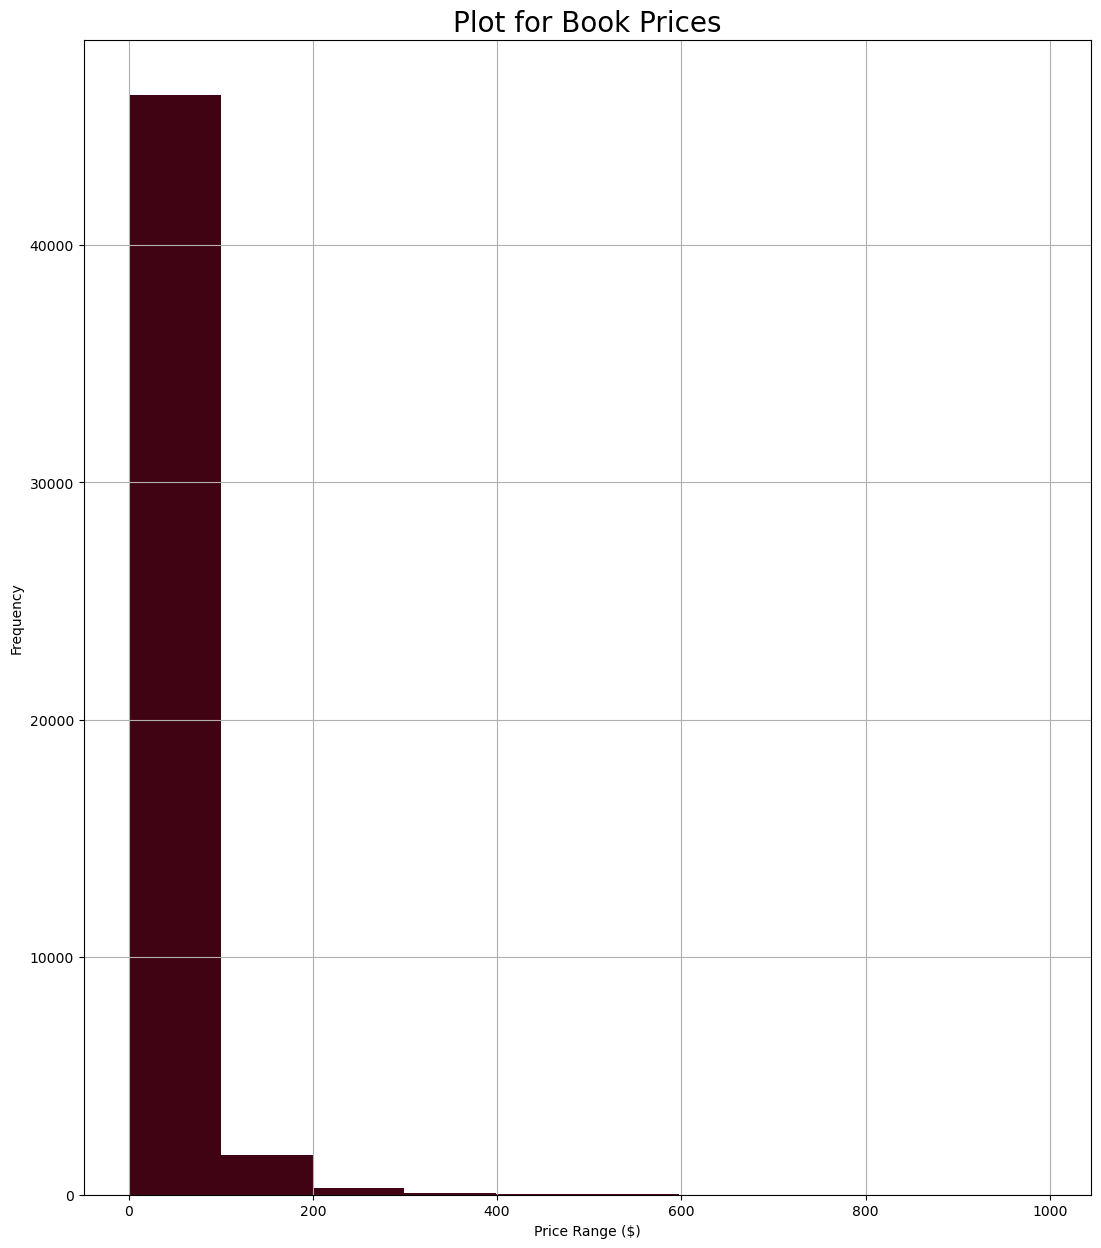

In [43]:
try:
    expensive_books.plot(kind=kind, figsize=(13, 15), color=['#400313', '#2a1842', '#012136', '#062b2b'])

except Exception as exc:
    print("! ", exc)

else:
    plt.title(text, fontsize=20)
    plt.grid()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()


### *G. Top-rated Books accumulating over 3500 Ratings in total (per book)*

In [44]:
accumulated_ratings = df_info[df_info['ratings_count'] > 3500][['book_title', 'ratings_count']]\
            .drop_duplicates()

accumulated_ratings

,book_title,ratings_count
10176,On Fire.,3802.0
12277,The Watchmen,3907.0
16499,The cat in the hat,3638.0
22370,Zen and the Art of Motorcycle Maintenance,3618.0
25239,The Habit of Living,3863.0
26834,The Alchemist,4895.0
28711,A History of the United States,3907.0
31260,Henrietta,4067.0
33680,Red Tent,3656.0
38618,Me Talk Pretty One Day,3638.0


In [45]:
df_arg = accumulated_ratings.sort_values(by=['ratings_count'], ascending=False)

df_arg

,book_title,ratings_count
26834,The Alchemist,4895.0
76345,Unbroken,4572.0
62005,A Mission to Millions; The Story of Ernie Alle...,4572.0
128081,Blue Like Jazz: Nonreligious Thoughts on Chris...,4562.0
57822,Eclipse,4392.0
127021,Redeeming Love,4249.0
112603,A Walk in the Woods,4234.0
162135,The Tipping Point: How Little Things Can Make ...,4218.0
159446,"Travel Light, Eat Heavy Along the Appalachian ...",4161.0
31260,Henrietta,4067.0


### *Generate a Bar Plot for visual evidence*


<Figure size 1300x1500 with 0 Axes>

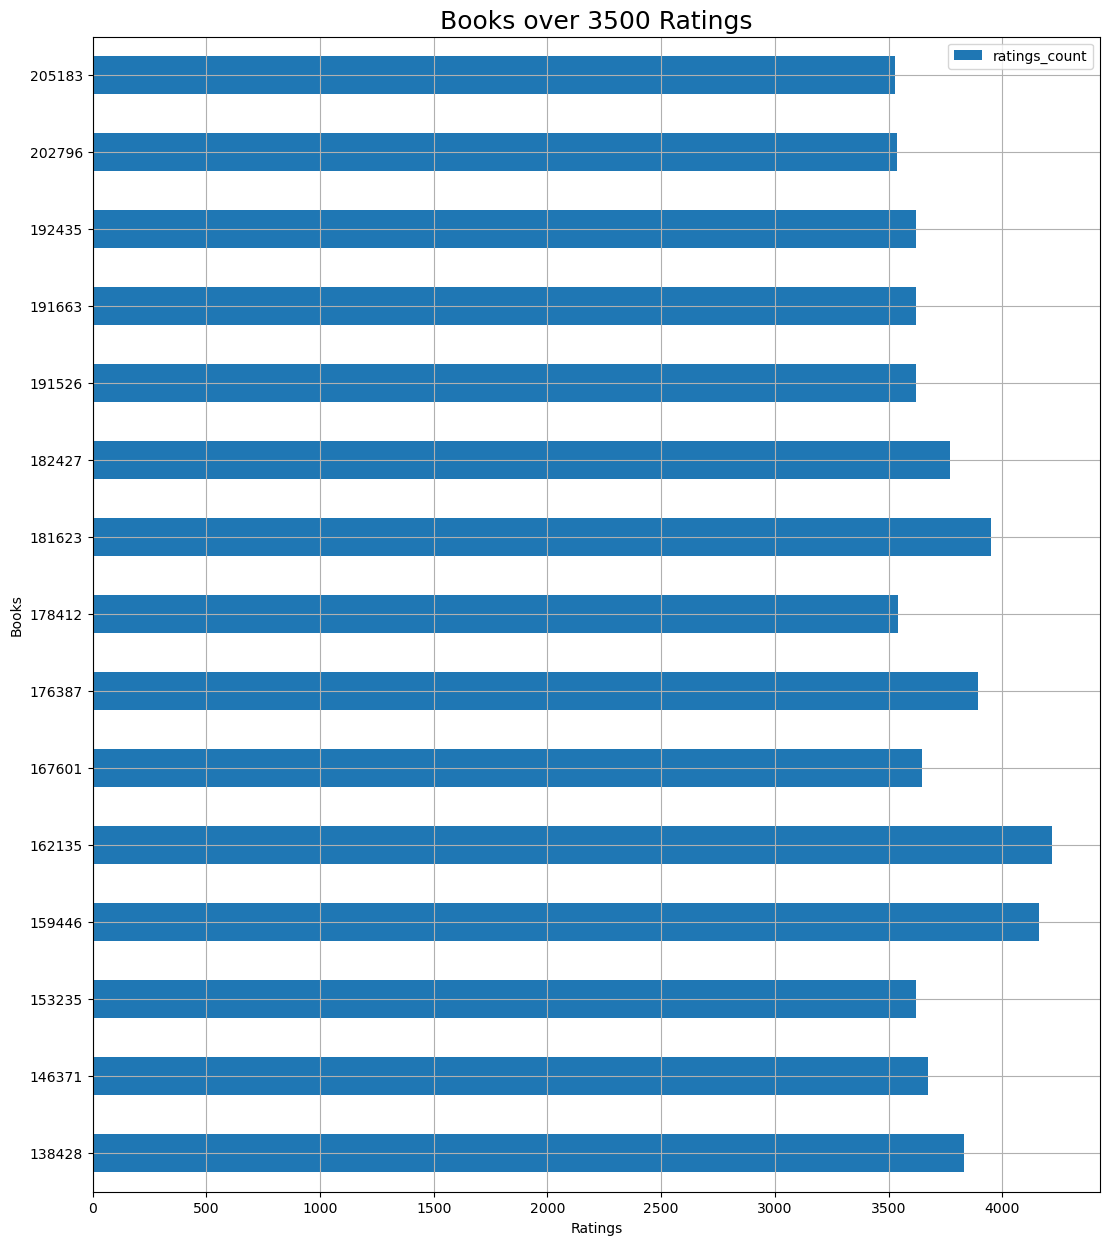

In [46]:
text = "Books over 3500 Ratings"
x_label = "Ratings"
y_label = "Books"

plt.figure(figsize=(13, 15))
accumulated_ratings[-15:].plot(kind='barh', figsize=(13, 15))
plt.title(text, fontsize=18)
plt.grid()
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.show()

### *H. Total books in a particular category*

In [47]:
category_books = df_info.groupby('categories')['book_title'].count().sort_values()
df_temp_info = category_books.to_frame()
df_temp_info['category_books'] = category_books

df_temp_info['category_books']

categories
["'Abd al-Bah̄a, 1844-1921"]          1
['Homeopathic pharmacy']              1
['Homeopathic pharmacopoeias']        1
['Home']                              1
['Home missions']                     1
                                  ...  
['Biography & Autobiography']      6324
['Juvenile Fiction']               6643
['History']                        9330
['Religion']                       9459
['Fiction']                       23419
Name: category_books, Length: 10883, dtype: int64

In [48]:
df_arg = category_books.sort_values(ascending=False)

df_arg

categories
['Fiction']                      23419
['Religion']                      9459
['History']                       9330
['Juvenile Fiction']              6643
['Biography & Autobiography']     6324
                                 ...  
['Political scientists']             1
['Political psychology']             1
['Political planning']               1
['Political campaigns']              1
['Abnaki Indians']                   1
Name: book_title, Length: 10883, dtype: int64

### *Inspect query from the visualization chart*

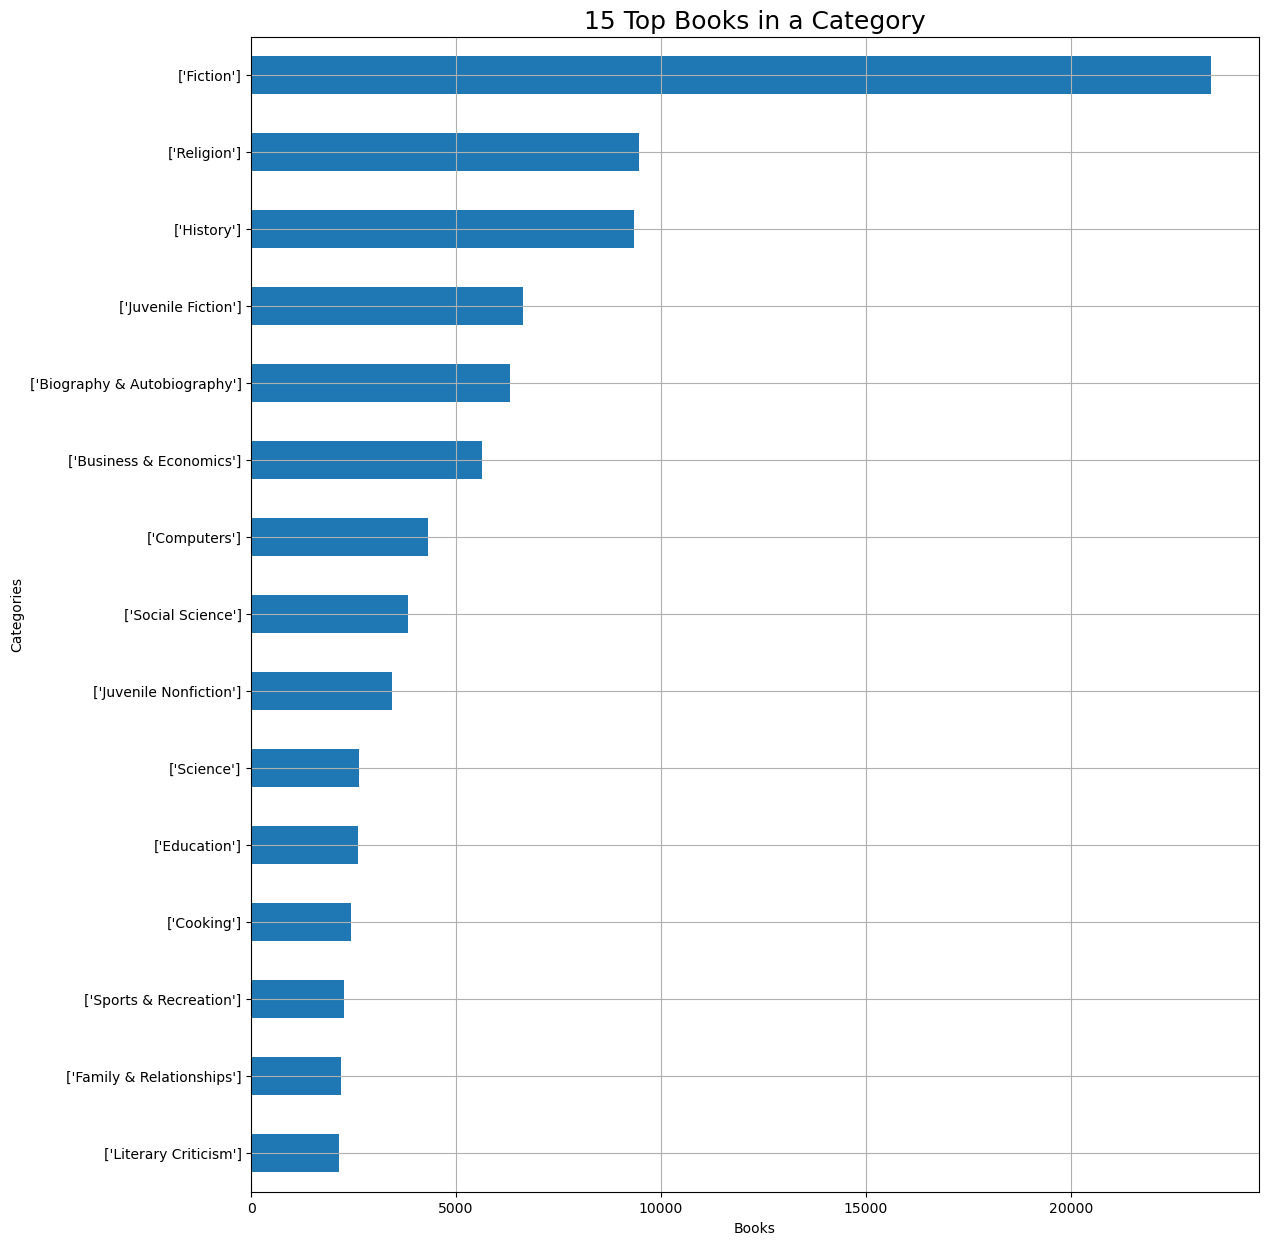

In [49]:
text = "15 Top Books in a Category"
x_label = "Books"
y_label = "Categories"

category_books[-15:].plot(kind='barh', figsize=(13, 15)) 
plt.title(text, fontsize=18) 
plt.grid() 
plt.xlabel(x_label) 
plt.ylabel(y_label) 
plt.show()

### *I. Authors with the most published books*

In [50]:
author_publish = df_info.groupby('book_author')['book_title'].count().sort_values().sort_values()
df_temp_info = author_publish.to_frame()
df_temp_info['author_publish'] = author_publish

df_temp_info['author_publish']

book_author
['Maharshi Ramana']                                    0
['Dick Quinn', 'Shannon Quinn']                        1
['Dick Raymond', 'Elayne Sears', 'Paul Boisvert']      1
['Dick Raymond', 'Outlet']                             1
['Dick Reavis']                                        1
                                                    ... 
['Erle Stanley Gardner']                             124
['Agatha Christie']                                  142
['Library of Congress. Copyright Office']            178
['William Shakespeare']                              191
['Rose Arny']                                        236
Name: author_publish, Length: 127278, dtype: int64

In [51]:
df_arg = author_publish.sort_values(ascending=False)

df_arg

book_author
['Rose Arny']                                       236
['William Shakespeare']                             191
['Library of Congress. Copyright Office']           178
['Agatha Christie']                                 142
['Erle Stanley Gardner']                            124
                                                   ... 
['Bill Bridges']                                      1
['Bill Bridges', 'Phil Brucato', 'Ethan Skemp']       1
['Bill Bridges', 'Daniel Greenberg', 'Teeuwynn']      1
['Bill Brennan']                                      1
['Maharshi Ramana']                                   0
Name: book_title, Length: 127278, dtype: int64

### *Represent the query via a Bar chart*

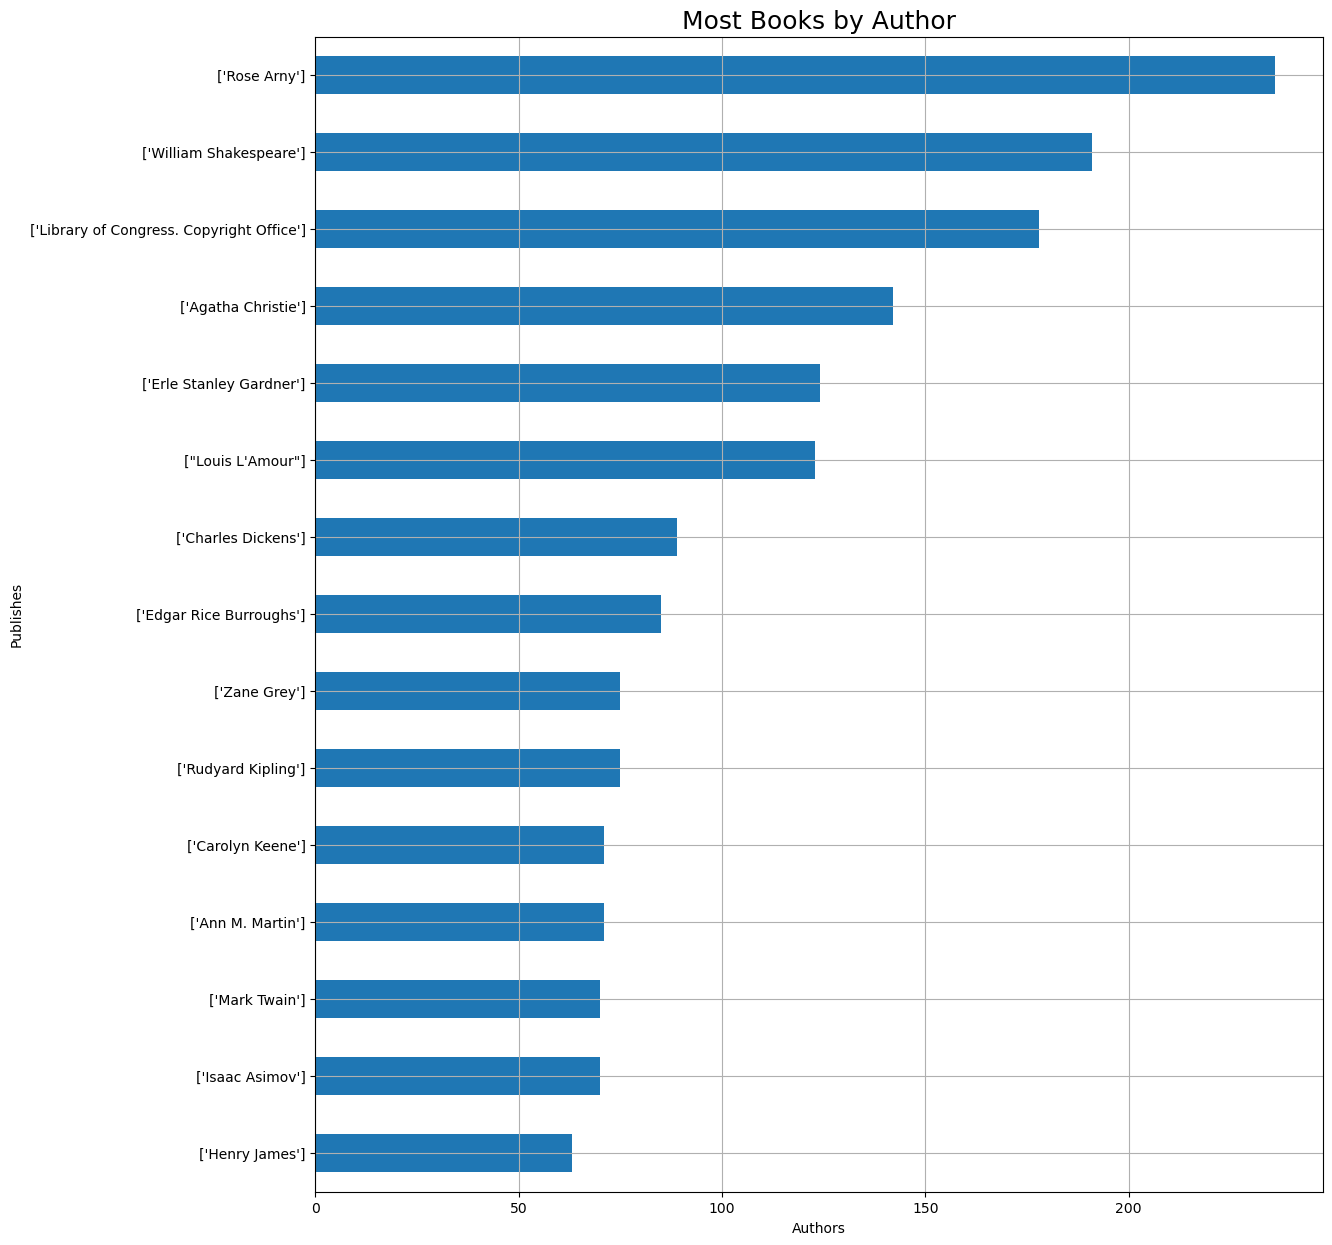

In [52]:
text = "Most Books by Author"
x_label = "Authors"
y_label = "Publishes"

author_publish[-15:].plot(kind='barh', figsize=(13, 15)) 
plt.title(text, fontsize=18) 
plt.grid() 
plt.xlabel(x_label) 
plt.ylabel(y_label) 
plt.show()

### *J. Author's active years*

In [53]:
author_years = df_info.groupby('book_author')['published_year'].nunique()
df_temp_info = author_years.to_frame()
df_temp_info['author_years'] = author_years

df_temp_info['author_years']

book_author
["'Abd al-Samih Abu 'Umar"]                                                           1
["'Annah Sobelman"]                                                                   1
["'Jig rten mgon po (('Bri gung chos rje ;)", 'Khenpo Rinpochay Könchok Gyaltsen']    1
["A'isha Ajayi"]                                                                      1
["A. H. Gebhard-L'Estrange"]                                                          1
                                                                                     ..
['생명의말씀사편집부']                                                                         1
['알렉상드르 뒤마(Alexandre Dumas)']                                                         1
['임병균외']                                                                              1
['편집부']                                                                               3
['편집부편']                                                                              1
Name: author_years, 

In [54]:
df_arg = author_years.sort_values(ascending=False)

df_arg

book_author
['William Shakespeare']                      81
['Erle Stanley Gardner']                     51
['Charles Dickens']                          48
['Mark Twain']                               44
['Library of Congress. Copyright Office']    43
                                             ..
['William Sheehan']                           0
['Anne Argula']                               0
['Barrowsm Spencer Houghton']                 0
['Adam Pfaff']                                0
['Kathleen Sue Fine-Dare']                    0
Name: published_year, Length: 127278, dtype: int64

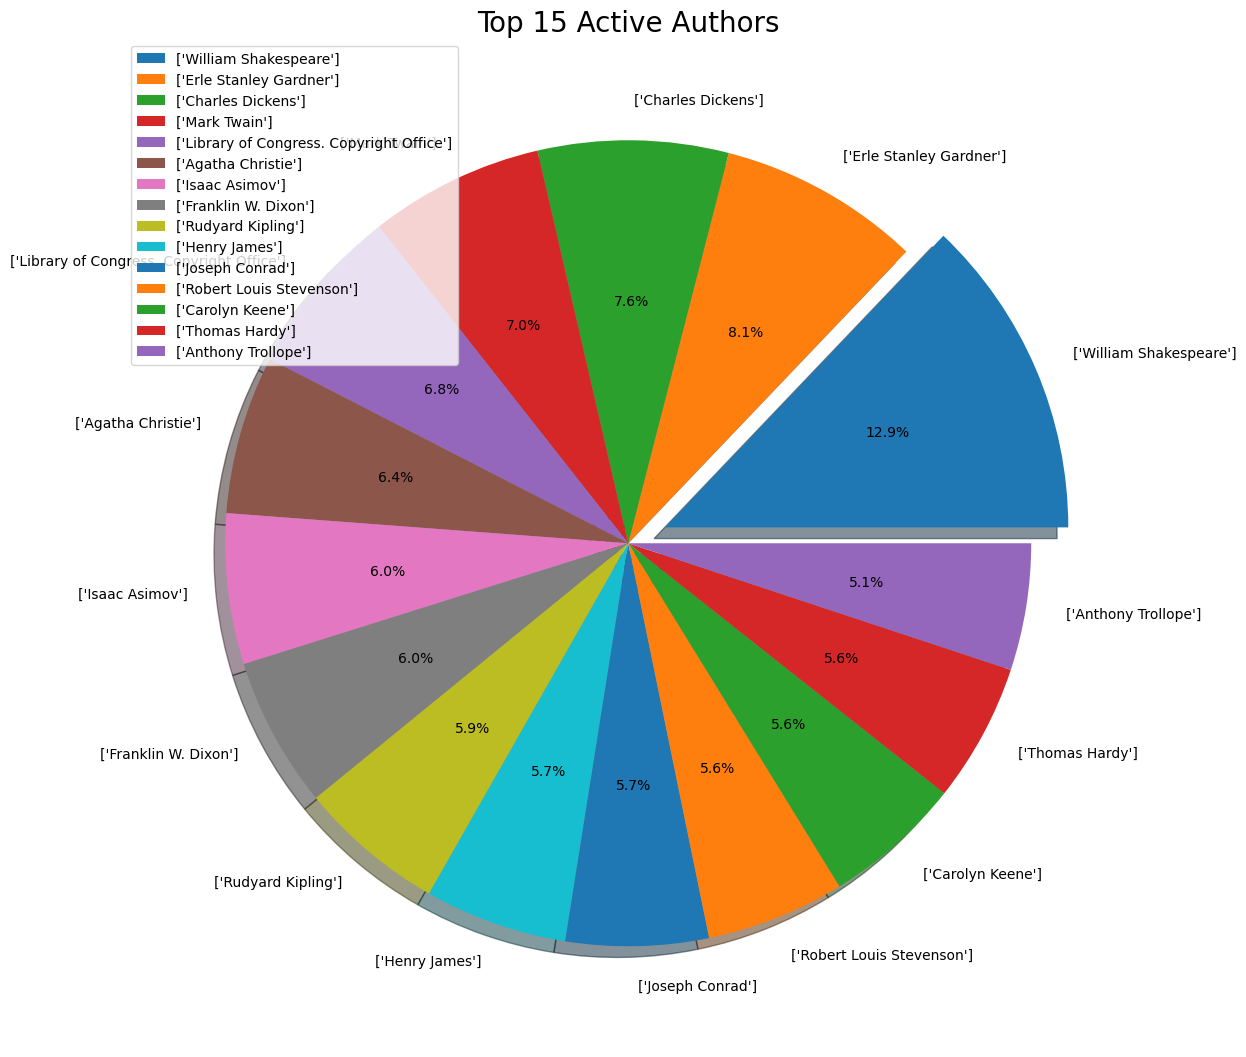

In [55]:
text = "Top 15 Active Authors"
df_arg = df_arg.head(15)
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
labels = df_arg.keys().map(str)
plt.figure(figsize=(13, 15))

try:
    plt.pie(df_arg, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)

except Exception as exc:
    print("! ", exc)

else:
    plt.title(text, fontsize=20)
    plt.axis('off')
    plt.legend(loc="upper left")
    plt.show()

### *K. Authors who worked in a variety genres of book genres*

In [56]:
author_categories = df_info.groupby('book_author')['categories'].nunique()
df_temp_info = author_categories.to_frame()
df_temp_info['author_categories'] = author_categories

df_temp_info['author_categories']

book_author
["'Abd al-Samih Abu 'Umar"]                                                           0
["'Annah Sobelman"]                                                                   1
["'Jig rten mgon po (('Bri gung chos rje ;)", 'Khenpo Rinpochay Könchok Gyaltsen']    1
["A'isha Ajayi"]                                                                      1
["A. H. Gebhard-L'Estrange"]                                                          1
                                                                                     ..
['생명의말씀사편집부']                                                                         1
['알렉상드르 뒤마(Alexandre Dumas)']                                                         1
['임병균외']                                                                              0
['편집부']                                                                               1
['편집부편']                                                                              1
Name: author_categor

In [57]:
df_arg = author_categories.sort_values(ascending=False)

df_arg

book_author
['William Shakespeare']               30
['Isaac Asimov']                      26
['Mark Twain']                        22
['Robert Louis Stevenson']            22
['DK']                                21
                                      ..
['Margaret E. Baron']                  0
['Margaret Elizabeth Bell']            0
['Margaret Emory']                     0
['Margaret Fairless Barber']           0
['Jonathan Hickman', 'Esad Ribic']     0
Name: categories, Length: 127278, dtype: int64

### *L. Display all analyzed Dataframes*

In [58]:
df_temp_rating.head(25)

,book_price,mean_price
book_title,,
""" Film technique, "" and, "" Film acting """,NaN,NaN
""" We'll Always Have Paris"": The Definitive Guide to Great Lines from the Movies",NaN,NaN
"""... And Poetry is Born ..."" Russian Classical Poetry",NaN,NaN
"""A Titanic hero"" Thomas Andrews, shipbuilder",NaN,NaN
"""A Truthful Impression of the Country"": British and American Travel Writing in China, 1880-1949",70.27,70.27
"""A careless word, a needless sinking"": A history of the staggering losses suffered by the U.S. Merchant Marine, both in ships and personnel during World War II",NaN,NaN
"""A careless word-- a needless sinking"": A history of the staggering losses suffered by the U.S. Merchant Marine, both in ships and personnel during World War II",NaN,NaN
"""A giant in the earth,"": A biography of Dr. J. B. Boddie,",NaN,NaN
"""A kind of life"": Conversations in the combat zone",NaN,NaN


In [59]:
df_temp_info.head(25)

,categories,author_categories
book_author,,
"[""'Abd al-Samih Abu 'Umar""]",0,0
"[""'Annah Sobelman""]",1,1
"[""'Jig rten mgon po (('Bri gung chos rje ;)"", 'Khenpo Rinpochay Könchok Gyaltsen']",1,1
"[""A'isha Ajayi""]",1,1
"[""A. H. Gebhard-L'Estrange""]",1,1
"[""Aaron Ben-Ze'ev"", 'Ruhama Goussinsky']",1,1
"[""Adam I. O'Hirsi""]",1,1
"[""Adam O'Neill""]",1,1
"[""Aimee O'Brian""]",1,1
